# **Email Spam Classifier**

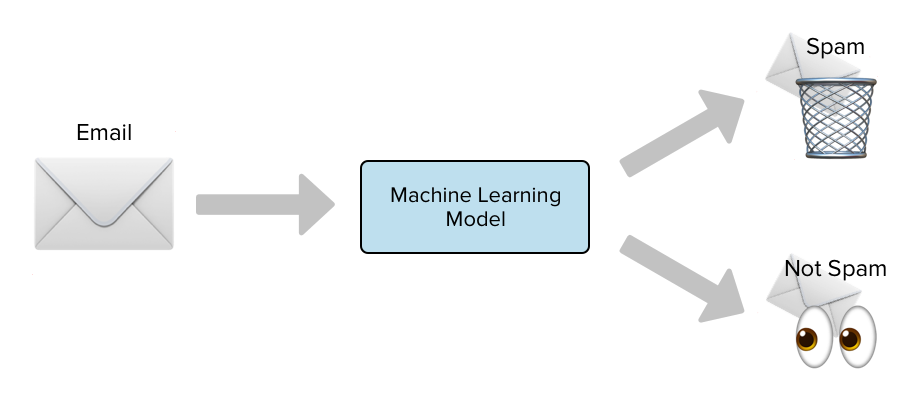

## By : Muhammad Arslan khalid

# **Abstract**

This project focuses on the development and evaluation of machine learning models for email classification into spam and non-spam categories. Using the provided email dataset, various classifiers such as Multinomial Naive Bayes, Logistic Regression, Support Vector Machine, Decision Tree, and K-Nearest Neighbors are explored and assessed for their effectiveness in accurately categorizing emails. The project aims to identify the most suitable classifier for efficient spam detection, thus improving email filtering systems' performance and reducing the inconvenience caused by spam emails

# I**ntroduction**

Email classification, particularly spam detection, is a critical task in modern communication systems. With the exponential growth of email traffic, distinguishing between legitimate emails and spam is essential to ensure users' productivity and security. Machine learning techniques offer robust solutions for automating this process by training models to identify spam patterns and predict email categories accurately. This project leverages various machine learning algorithms to develop and evaluate email classifiers, aiming to enhance email filtering systems' performance and user experience

# **Roadmap**

- **Data Collection**: Obtain a labeled email dataset containing examples of both spam and non-spam emails.
- **Data Preprocessing**: Perform data cleaning, including text normalization, removal of stopwords, and vectorization of text data using techniques like TF-IDF.
- **Exploratory Data Analysis (EDA)**: Explore the distribution of spam and non-spam emails, analyze common words or phrases in each category, and identify potential features for classification.
- **Model Building**: Train multiple machine learning models, including Multinomial Naive Bayes, Logistic Regression, Support Vector Machine, Decision Tree, and K-Nearest Neighbors, on the preprocessed email data.
- **Model Evaluation**: Assess the performance of each model using evaluation metrics such as accuracy, precision, recall, F1-score, and confusion matrix analysis.
- **Hyperparameter Tuning**: Fine-tune the hyperparameters of selected models using techniques like grid search or randomized search to optimize performance.
- **Model Comparison**: Compare the performance of tuned models and select the most effective classifier based on evaluation metrics.
- **Testing and Deployment**: Test the selected classifier on new, unseen email data to evaluate its real-world performance. If satisfactory, deploy the classifier in email filtering systems to classify incoming emails accurately.

# **Collect Data Set**

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import pickle
from nltk.corpus import stopwords
import string
from sklearn.model_selection import GridSearchCV

## Read the dataset

In [2]:
df = pd.read_csv('spam.csv')

## Display a sample of the dataset

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2183,ham,"Chinatown got porridge, claypot rice, yam cake...",NaN,NaN,NaN
2008,ham,See the forwarding message for proof,NaN,NaN,NaN
413,ham,Bring home some Wendy =D,NaN,NaN,NaN
2627,ham,I know I'm lacking on most of this particular ...,NaN,NaN,NaN
4781,ham,"Call me, i am senthil from hsbc.",NaN,NaN,NaN


## Get the shape of the dataset

In [4]:
df.shape

(5572, 5)

# **Data Cleaning**

## Display information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Check for missing values

In [6]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


## Check for duplicate rows

In [7]:
duplicate_rows = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 403


## Remove duplicate rows

In [8]:
df = df.drop_duplicates()

## Drop unnecessary columns

In [9]:
unnecessary_columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(columns=unnecessary_columns, errors='ignore')

## Rename the columns for better understanding

In [10]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

## Display a sample after cleaning

In [11]:
df.sample(5)

,target,text
3352,ham,I emailed yifeng my part oredi.. Can �_ get it...
3255,ham,Who were those people ? Were you in a tour ? I...
4664,ham,Ok set let u noe e details later...
512,ham,Lol ok your forgiven :)
1641,ham,"Hi , where are you? We're at and they're not ..."


In [12]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Check for duplicate values


In [13]:
df.duplicated().sum()

0

## Remove duplicates

In [14]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()
df.shape

(5169, 2)

In [15]:

df.isnull().sum()

target    0
text      0
dtype: int64

# **Exploratory Data Analysis (EDA)**

## Display value counts of the target variable

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

## Visualize the distribution of target variable

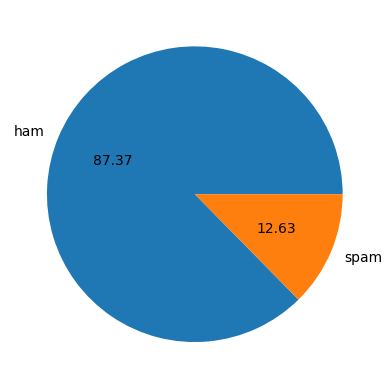

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

## Data is imbalanced

In [18]:
nltk.download('punkt')
df['num_characters'] = df['text'].apply(len)
df.head()

[nltk_data] Downloading package punkt to C:\Users\Arslan
[nltk_data]     Khalid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Num of words

In [19]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


## Ham

In [20]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


## Spam

In [21]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


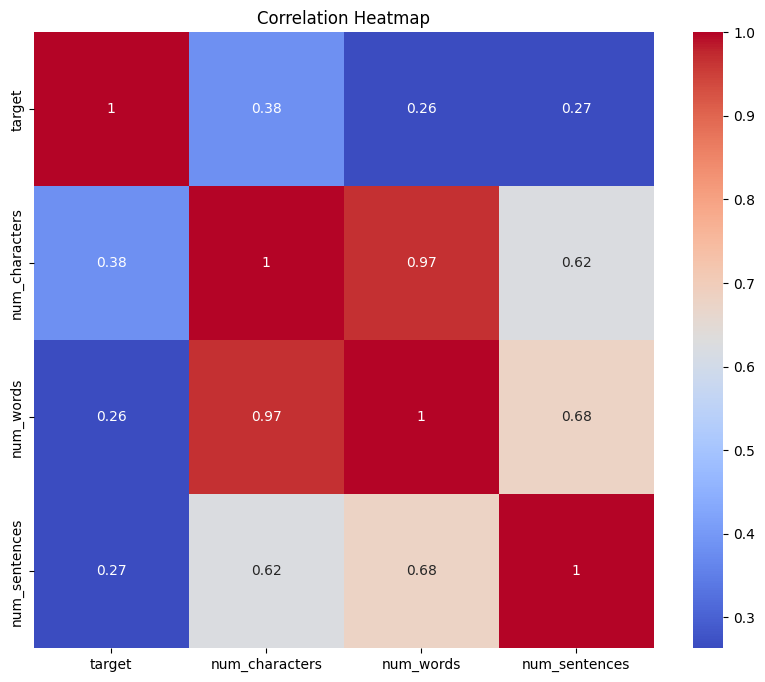

In [22]:
# Exclude non-numeric columns before generating correlation matrix
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Data Preprocessing**

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Arslan
[nltk_data]     Khalid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Function for Text Preprocessing

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


## Apply text transformation to the 'text' column

In [25]:
df['transformed_text'] = df['text'].apply(transform_text)

## Word Cloud for spam messages

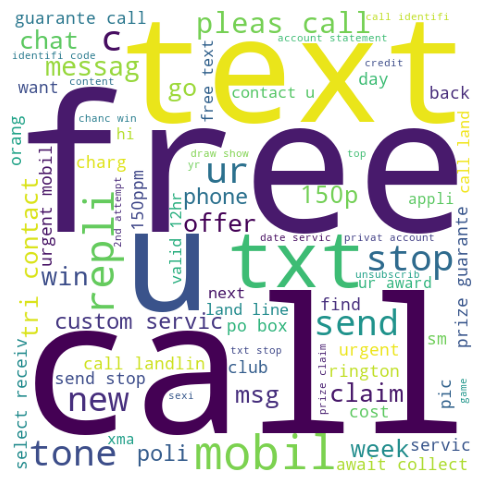

In [26]:
spam_corpus = ' '.join(df[df['target'] == 1]['transformed_text'].tolist())
spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(spam_corpus)
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

## Word Cloud for ham messages

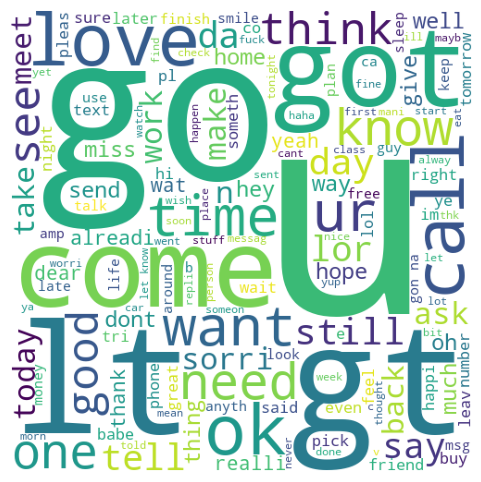

In [27]:
ham_corpus = ' '.join(df[df['target'] == 0]['transformed_text'].tolist())
ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(ham_corpus)
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

## Barplot for most common words in spam messages

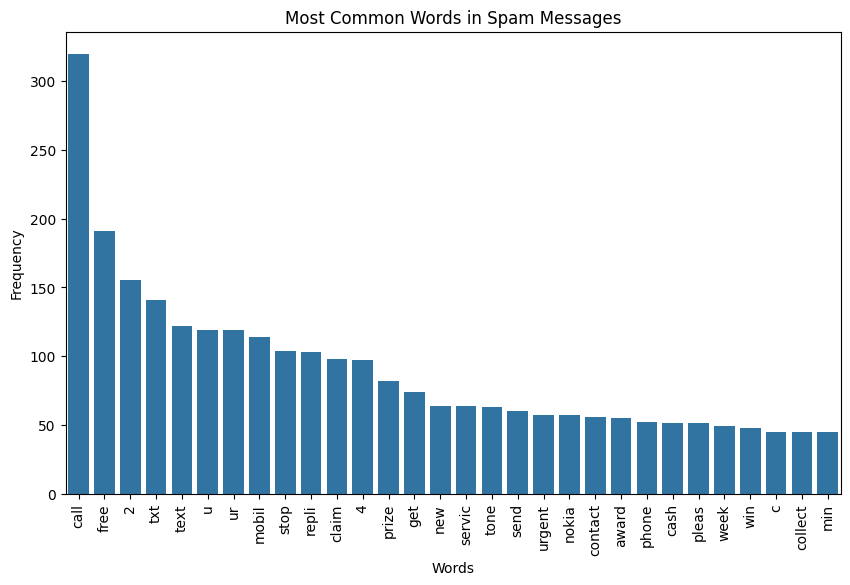

In [28]:
word_counts = Counter(spam_corpus.split()).most_common(30)
words = [word_count[0] for word_count in word_counts]
counts = [word_count[1] for word_count in word_counts]

plt.figure(figsize=(10, 6))
sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Spam Messages')
plt.show()

## Barplot for most common words in ham messages

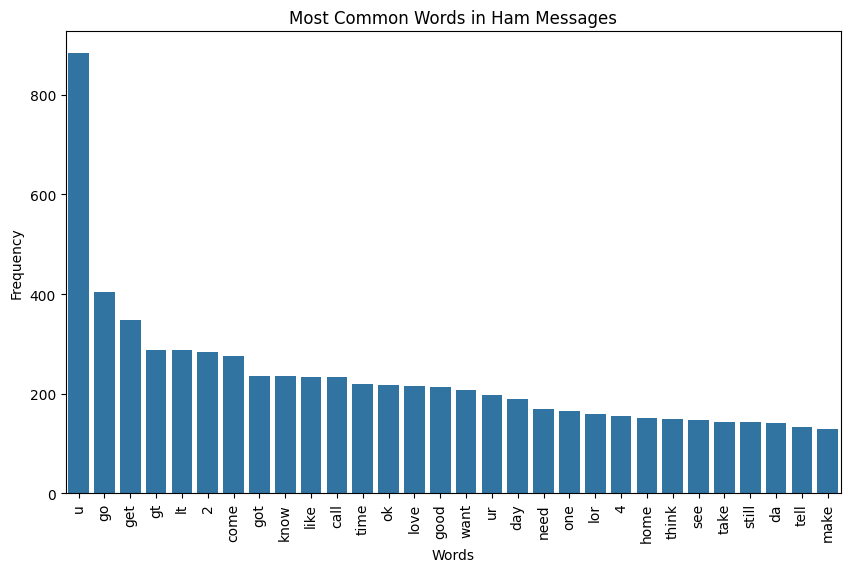

In [29]:
# Extract words and counts separately
word_counts = Counter(ham_corpus.split()).most_common(30)
words = [word_count[0] for word_count in word_counts]
counts = [word_count[1] for word_count in word_counts]

# Plot barplot for most common words in ham messages
plt.figure(figsize=(10, 6))
sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Ham Messages')
plt.show()

## Text Vectorization using Bag of Words

In [30]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the preprocessed text data
X_bow = count_vectorizer.fit_transform(df['transformed_text'])

# Display the shape of the resulting matrix
print("Shape of Bag of Words matrix:", X_bow.shape)

Shape of Bag of Words matrix: (5169, 6677)


# **Model Building**

## Split the data into train and test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

## Initialize TF-IDF vectorizer

In [32]:
tfidf_vectorizer = TfidfVectorizer()

## Fit and transform the training data

In [33]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

## Transform the test data (using only transform, not fit_transform)

In [34]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## **Model Building and Evaluation using Naive Bayes Multinomial**

## Initialize and fit MultinomialNB model

In [35]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

## Predict

In [36]:
y_pred_mnb = mnb.predict(X_test_tfidf)

## Evaluate

In [37]:
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb)
confusion_mat_mnb = confusion_matrix(y_test, y_pred_mnb)

print("\n--- Naive Bayes Multinomial Classifier ---")
print("Accuracy:", accuracy_mnb)
print("Precision:", precision_mnb)
print("Confusion Matrix:")
print(confusion_mat_mnb)


--- Naive Bayes Multinomial Classifier ---
Accuracy: 0.9555125725338491
Precision: 1.0
Confusion Matrix:
[[889   0]
 [ 46  99]]


## **Model Building and Evaluation using Decision Tree (J48)**

## Initialize and fit Decision Tree Classifier

In [38]:
j48 = DecisionTreeClassifier()
j48.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

## Predict

In [39]:
y_pred_j48 = j48.predict(X_test_tfidf)

## Evaluate

In [40]:
accuracy_j48 = accuracy_score(y_test, y_pred_j48)
precision_j48 = precision_score(y_test, y_pred_j48)
confusion_mat_j48 = confusion_matrix(y_test, y_pred_j48)

print("\n--- Decision Tree Classifier (J48) ---")
print("Accuracy:", accuracy_j48)
print("Precision:", precision_j48)
print("Confusion Matrix:")
print(confusion_mat_j48)


--- Decision Tree Classifier (J48) ---
Accuracy: 0.9584139264990329
Precision: 0.8642857142857143
Confusion Matrix:
[[870  19]
 [ 24 121]]


# **Model Building and Evaluation using Logistic Regression**

## Initialize Logistic Regression model

In [41]:
logistic_regression = LogisticRegression()

## Fit the model using TF-IDF vectorized training data

In [42]:
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression()

## Predict on the TF-IDF vectorized test data

In [43]:
y_pred_lr = logistic_regression.predict(X_test_tfidf)

## Evaluate the model

In [44]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)

print("\n--- Logistic Regression Classifier ---")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Confusion Matrix:")
print(confusion_mat_lr)


--- Logistic Regression Classifier ---
Accuracy: 0.9680851063829787
Precision: 0.9745762711864406
Confusion Matrix:
[[886   3]
 [ 30 115]]


## **Model Building and Evaluation using Support Vector Machine (SVM)**

## Initialize SVM model

In [45]:
svm = SVC()

## Fit the model using TF-IDF vectorized training data

In [46]:
svm.fit(X_train_tfidf, y_train)

SVC()

## Predict on the TF-IDF vectorized test data

In [47]:
y_pred_svm = svm.predict(X_test_tfidf)

## Evaluate the model

In [48]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)

print("\n--- Support Vector Machine (SVM) Classifier ---")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Confusion Matrix:")
print(confusion_mat_svm)


--- Support Vector Machine (SVM) Classifier ---
Accuracy: 0.9845261121856866
Precision: 1.0
Confusion Matrix:
[[889   0]
 [ 16 129]]


## **Model Building and Evaluation using K-Nearest Neighbors (KNN)**

## Initialize KNN model

In [49]:
knn = KNeighborsClassifier()

## Fit the model using TF-IDF vectorized training data

In [50]:
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

## Predict on the TF-IDF vectorized test data

In [51]:
y_pred_knn = knn.predict(X_test_tfidf)

## Evaluate the model

In [52]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)

print("\n--- K-Nearest Neighbors (KNN) Classifier ---")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Confusion Matrix:")
print(confusion_mat_knn)


--- K-Nearest Neighbors (KNN) Classifier ---
Accuracy: 0.9003868471953579
Precision: 1.0
Confusion Matrix:
[[889   0]
 [103  42]]


# **Model Comparison**

## List of models, accuracies, and precisions

In [53]:
models = ['MultinomialNB', 'DecisionTree', 'LogisticRegression', 'SVC', 'KNeighborsClassifier' ]
accuracies = [accuracy_mnb, accuracy_j48, accuracy_lr, accuracy_svm, accuracy_knn]
precisions = [precision_mnb, precision_j48, precision_lr, precision_svm, precision_knn]

## **Plot accuracies**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


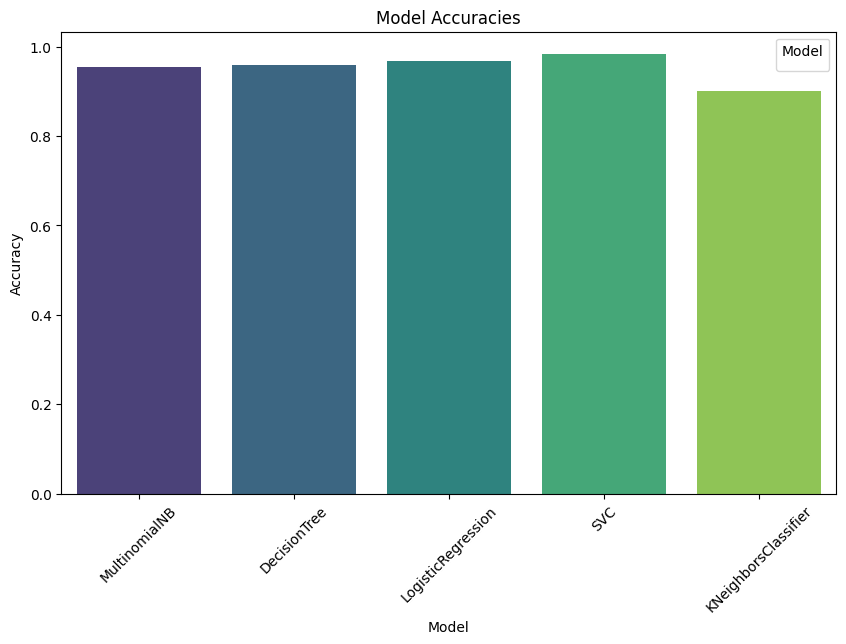

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette='viridis')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()

## **Plot precisions**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


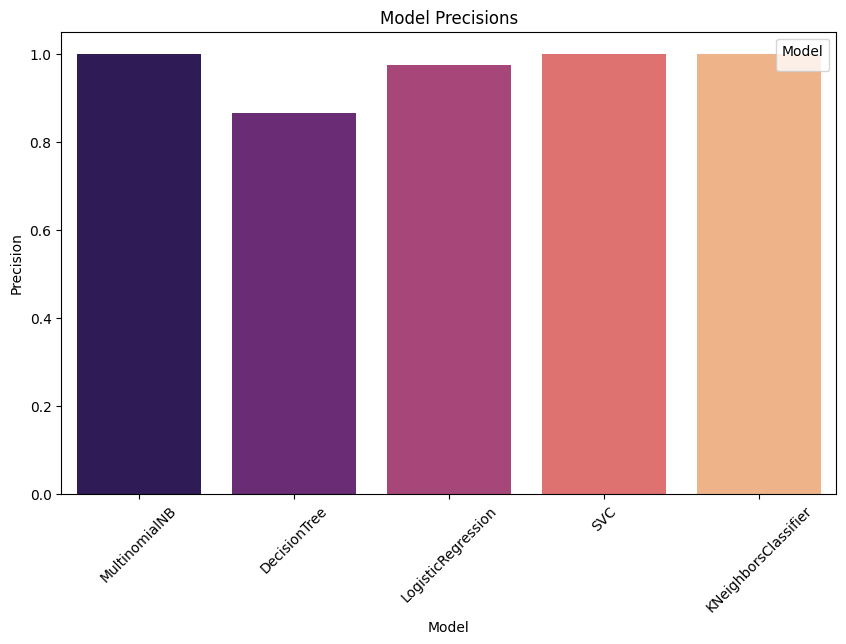

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=precisions, hue=models, palette='magma')
plt.title('Model Precisions')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()

## **Plot confusion matrices**

## Multinomial Naive Bayes

Text(283.22222222222223, 0.5, 'True Label')

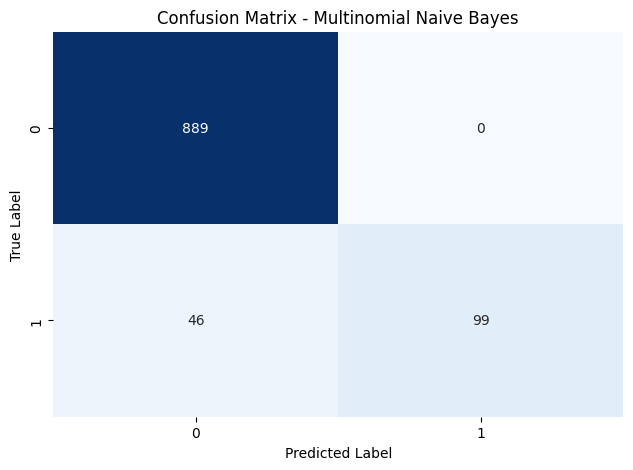

In [56]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_mat_mnb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Decision Tree Classifier

Text(967.045751633987, 0.5, 'True Label')

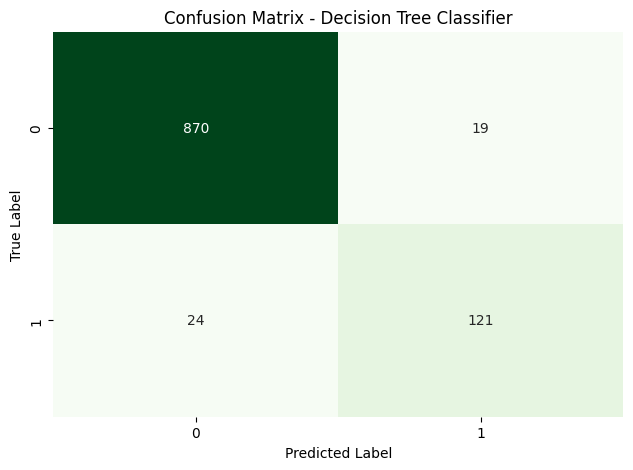

In [57]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 2)
sns.heatmap(confusion_mat_j48, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Logistic Regression

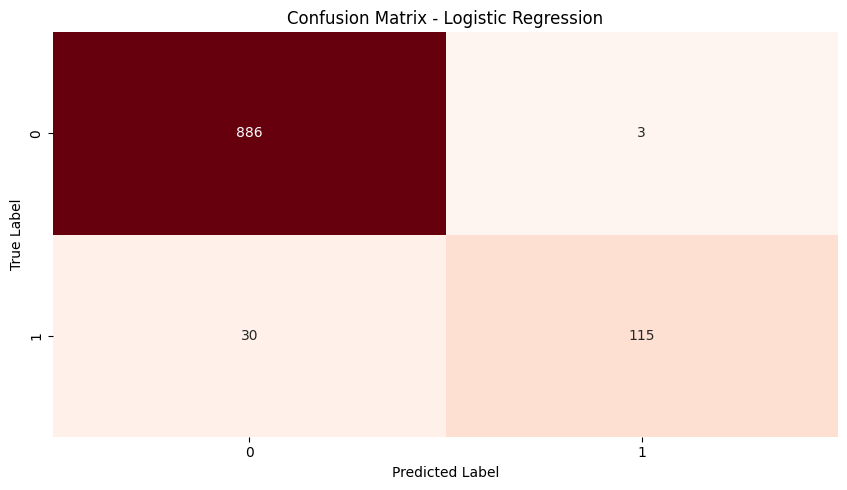

In [58]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 3)
sns.heatmap(confusion_mat_lr, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## SVM

Text(1059.4722222222222, 0.5, 'True Label')

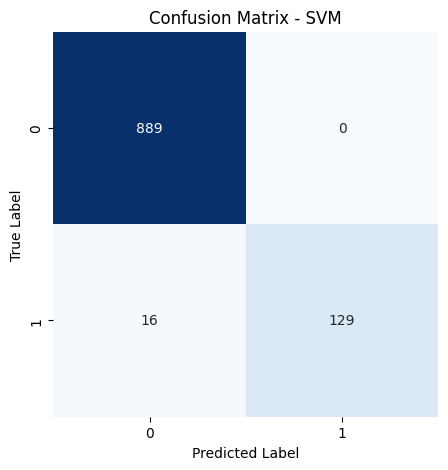

In [59]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 2)
sns.heatmap(confusion_mat_svm, annot=True, cmap='Blues', fmt='d', cbar=False, square=True)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## KNN

Text(1743.295751633987, 0.5, 'True Label')

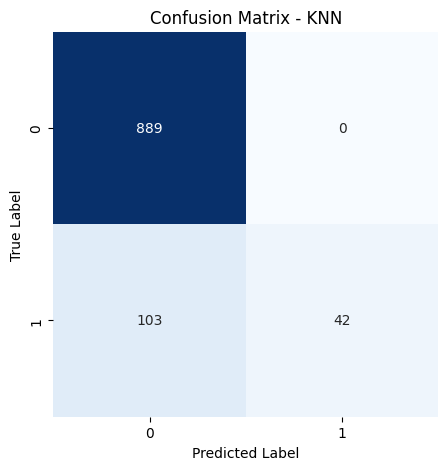

In [60]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 3)
sns.heatmap(confusion_mat_knn, annot=True, cmap='Blues', fmt='d', cbar=False, square=True)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# **Model Improvement and Ensemble Methods**

## Change max_features parameter of TfidfVectorizer

In [61]:
tfidf_vectorizer_max_ft_3000 = TfidfVectorizer(max_features=3000)
X_train_tfidf_max_ft_3000 = tfidf_vectorizer_max_ft_3000.fit_transform(X_train)
X_test_tfidf_max_ft_3000 = tfidf_vectorizer_max_ft_3000.transform(X_test)

## Voting Classifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

voting_mnb = VotingClassifier(estimators=[('svm', svc), ('et', etc), ('mnb', mnb)], voting='soft')
voting_mnb.fit(X_train_tfidf_max_ft_3000, y_train)
y_pred_voting_mnb = voting_mnb.predict(X_test_tfidf_max_ft_3000)
accuracy_voting_mnb = accuracy_score(y_test, y_pred_voting_mnb)
precision_voting_mnb = precision_score(y_test, y_pred_voting_mnb)

print("Voting Classifier Accuracy (MNB):", accuracy_voting_mnb)
print("Voting Classifier Precision (MNB):", precision_voting_mnb)

Voting Classifier Accuracy (MNB): 0.988394584139265
Voting Classifier Precision (MNB): 1.0


## Stacking

In [63]:
clf_mnb = StackingClassifier(estimators=[('svm', svc), ('et', etc)], final_estimator=RandomForestClassifier())
clf_mnb.fit(X_train_tfidf_max_ft_3000, y_train)
y_pred_stacking_mnb = clf_mnb.predict(X_test_tfidf_max_ft_3000)
accuracy_stacking_mnb = accuracy_score(y_test, y_pred_stacking_mnb)
precision_stacking_mnb = precision_score(y_test, y_pred_stacking_mnb)

print("Stacking Classifier Accuracy (MNB):", accuracy_stacking_mnb)
print("Stacking Classifier Precision (MNB):", precision_stacking_mnb)

Stacking Classifier Accuracy (MNB): 0.9864603481624759
Stacking Classifier Precision (MNB): 0.958041958041958


# **Hyperparameter Tuning**

## Multinomial Naive Bayes classifier

In [64]:
# Define the range of alpha values to search
alpha_values = [0.1, 0.5, 1.0, 1.5, 2.0]

# Create a parameter grid
param_grid = {'alpha': alpha_values}

# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

Best alpha: 0.1


In [65]:
# Retrain the Multinomial Naive Bayes classifier with the best alpha value
mnb_best = MultinomialNB(alpha=best_alpha)
mnb_best.fit(X_train_tfidf, y_train)

# Predict using the tuned classifier
y_pred_mnb_tuned = mnb_best.predict(X_test_tfidf)

# Evaluate the tuned classifier
accuracy_mnb_tuned = accuracy_score(y_test, y_pred_mnb_tuned)
precision_mnb_tuned = precision_score(y_test, y_pred_mnb_tuned)
confusion_mat_mnb_tuned = confusion_matrix(y_test, y_pred_mnb_tuned)

print("Tuned Multinomial Naive Bayes Classifier:")
print("Accuracy:", accuracy_mnb_tuned)
print("Precision:", precision_mnb_tuned)
print("Confusion Matrix:")
print(confusion_mat_mnb_tuned)

Tuned Multinomial Naive Bayes Classifier:
Accuracy: 0.9835589941972921
Precision: 0.9848484848484849
Confusion Matrix:
[[887   2]
 [ 15 130]]


## Decision Tree , Logistic Regression , SVM , KNN

In [66]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data (using only transform, not fit_transform)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define hyperparameters for each model
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_logistic_regression = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Fine-tune Decision Tree
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train_tfidf, y_train)
best_decision_tree = grid_search_decision_tree.best_estimator_

# Fine-tune Logistic Regression
grid_search_logistic_regression = GridSearchCV(LogisticRegression(), param_grid_logistic_regression, cv=5)
grid_search_logistic_regression.fit(X_train_tfidf, y_train)
best_logistic_regression = grid_search_logistic_regression.best_estimator_

# Fine-tune SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_tfidf, y_train)
best_svm = grid_search_svm.best_estimator_

# Fine-tune KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_tfidf, y_train)
best_knn = grid_search_knn.best_estimator_

# Test the tuned models on the test data
models = {
    'Decision Tree': best_decision_tree,
    'Logistic Regression': best_logistic_regression,
    'SVM': best_svm,
    'KNN': best_knn
}

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    print("\n---", name, "---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Confusion Matrix:")
    print(confusion_mat)


--- Decision Tree ---
Accuracy: 0.9564796905222437
Precision: 0.8623188405797102
Confusion Matrix:
[[870  19]
 [ 26 119]]

--- Logistic Regression ---
Accuracy: 0.9845261121856866
Precision: 0.9708029197080292
Confusion Matrix:
[[885   4]
 [ 12 133]]

--- SVM ---
Accuracy: 0.9845261121856866
Precision: 0.9640287769784173
Confusion Matrix:
[[884   5]
 [ 11 134]]

--- KNN ---
Accuracy: 0.9439071566731141
Precision: 1.0
Confusion Matrix:
[[889   0]
 [ 58  87]]


## Tunning Decision Tree Again for Accuracy

In [71]:
# Initialize Decision Tree classifier with adjusted hyperparameters
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train_tfidf, y_train)

# Predict using the trained Decision Tree classifier
y_pred_dt = dt_classifier.predict(X_test_tfidf)

# Evaluate the Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)

# Print evaluation metrics
print("Decision Tree Classifier (Tuned):")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Confusion Matrix:")
print(confusion_mat_dt)

Decision Tree Classifier (Tuned):
Accuracy: 0.9497098646034816
Precision: 0.8907563025210085
Confusion Matrix:
[[876  13]
 [ 39 106]]


# **Testing**

In [68]:
# Transform the message using the TF-IDF vectorizer
message_tfidf = tfidf_vectorizer.transform(["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"])

# Initialize models
dt_classifier = DecisionTreeClassifier(**best_decision_tree.get_params())
mnb_classifier = MultinomialNB(**grid_search.best_params_)
lr_classifier = LogisticRegression(**best_logistic_regression.get_params())
svm_classifier = SVC(**best_svm.get_params())
knn_classifier = KNeighborsClassifier(**best_knn.get_params())

# Load pre-trained models
dt_classifier.fit(X_train_tfidf, y_train)
mnb_classifier.fit(X_train_tfidf, y_train)
lr_classifier.fit(X_train_tfidf, y_train)
svm_classifier.fit(X_train_tfidf, y_train)
knn_classifier.fit(X_train_tfidf, y_train)

# Predict using all models
y_pred_dt = dt_classifier.predict(message_tfidf)
y_pred_mnb = mnb_classifier.predict(message_tfidf)
y_pred_lr = lr_classifier.predict(message_tfidf)
y_pred_svm = svm_classifier.predict(message_tfidf)
y_pred_knn = knn_classifier.predict(message_tfidf)

# Print predictions
print("Decision Tree:", "Spam" if y_pred_dt[0] == 1 else "Not Spam")
print("Multinomial Naive Bayes:", "Spam" if y_pred_mnb[0] == 1 else "Not Spam")
print("Logistic Regression:", "Spam" if y_pred_lr[0] == 1 else "Not Spam")
print("Support Vector Machine:", "Spam" if y_pred_svm[0] == 1 else "Not Spam")
print("K-Nearest Neighbors:", "Spam" if y_pred_knn[0] == 1 else "Not Spam")


Decision Tree: Spam
Multinomial Naive Bayes: Spam
Logistic Regression: Spam
Support Vector Machine: Spam
K-Nearest Neighbors: Spam


In [69]:
# Transform the message using the TF-IDF vectorizer
message_tfidf = tfidf_vectorizer.transform(["Thanks for your subscription to Ringtone UK your mobile will be charged ï¿½5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"])

# Initialize models
dt_classifier = DecisionTreeClassifier(**best_decision_tree.get_params())
mnb_classifier = MultinomialNB(**grid_search.best_params_)
lr_classifier = LogisticRegression(**best_logistic_regression.get_params())
svm_classifier = SVC(**best_svm.get_params())
knn_classifier = KNeighborsClassifier(**best_knn.get_params())

# Load pre-trained models
dt_classifier.fit(X_train_tfidf, y_train)
mnb_classifier.fit(X_train_tfidf, y_train)
lr_classifier.fit(X_train_tfidf, y_train)
svm_classifier.fit(X_train_tfidf, y_train)
knn_classifier.fit(X_train_tfidf, y_train)

# Predict using all models
y_pred_dt = dt_classifier.predict(message_tfidf)
y_pred_mnb = mnb_classifier.predict(message_tfidf)
y_pred_lr = lr_classifier.predict(message_tfidf)
y_pred_svm = svm_classifier.predict(message_tfidf)
y_pred_knn = knn_classifier.predict(message_tfidf)

# Print predictions
print("Decision Tree:", "Spam" if y_pred_dt[0] == 1 else "Not Spam")
print("Multinomial Naive Bayes:", "Spam" if y_pred_mnb[0] == 1 else "Not Spam")
print("Logistic Regression:", "Spam" if y_pred_lr[0] == 1 else "Not Spam")
print("Support Vector Machine:", "Spam" if y_pred_svm[0] == 1 else "Not Spam")
print("K-Nearest Neighbors:", "Spam" if y_pred_knn[0] == 1 else "Not Spam")


Decision Tree: Spam
Multinomial Naive Bayes: Spam
Logistic Regression: Spam
Support Vector Machine: Spam
K-Nearest Neighbors: Spam


In [70]:
# Transform the message using the TF-IDF vectorizer
message_tfidf = tfidf_vectorizer.transform(["I HAVE A DATE ON SUNDAY WITH WILL!!"])

# Initialize models
dt_classifier = DecisionTreeClassifier(**best_decision_tree.get_params())
mnb_classifier = MultinomialNB(**grid_search.best_params_)
lr_classifier = LogisticRegression(**best_logistic_regression.get_params())
svm_classifier = SVC(**best_svm.get_params())
knn_classifier = KNeighborsClassifier(**best_knn.get_params())

# Load pre-trained models
dt_classifier.fit(X_train_tfidf, y_train)
mnb_classifier.fit(X_train_tfidf, y_train)
lr_classifier.fit(X_train_tfidf, y_train)
svm_classifier.fit(X_train_tfidf, y_train)
knn_classifier.fit(X_train_tfidf, y_train)

# Predict using all models
y_pred_dt = dt_classifier.predict(message_tfidf)
y_pred_mnb = mnb_classifier.predict(message_tfidf)
y_pred_lr = lr_classifier.predict(message_tfidf)
y_pred_svm = svm_classifier.predict(message_tfidf)
y_pred_knn = knn_classifier.predict(message_tfidf)

# Print predictions
print("Decision Tree:", "Spam" if y_pred_dt[0] == 1 else "Not Spam")
print("Multinomial Naive Bayes:", "Spam" if y_pred_mnb[0] == 1 else "Not Spam")
print("Logistic Regression:", "Spam" if y_pred_lr[0] == 1 else "Not Spam")
print("Support Vector Machine:", "Spam" if y_pred_svm[0] == 1 else "Not Spam")
print("K-Nearest Neighbors:", "Spam" if y_pred_knn[0] == 1 else "Not Spam")


Decision Tree: Not Spam
Multinomial Naive Bayes: Not Spam
Logistic Regression: Not Spam
Support Vector Machine: Not Spam
K-Nearest Neighbors: Not Spam


# **Literature Review**

Previous research in email classification has demonstrated the efficacy of machine learning techniques in accurately categorizing emails into spam and non-spam classes. Several studies have investigated various algorithms, feature engineering methods, and datasets to improve classification accuracy and robustness. Challenges in email classification include handling imbalanced datasets, selecting appropriate features, and interpreting model predictions for practical use. This project builds upon existing literature to develop an integrated framework for email classification, encompassing data preprocessing, feature selection, model training, and evaluation to advance the field of email filtering and spam detection

# **Conclusion**

- In conclusion, this project highlights the potential of machine learning algorithms in email classification tasks. Through rigorous data preprocessing, feature engineering, model training, and evaluation, we have explored diverse approaches to accurately distinguish between spam and non-spam emails. Our study underscores the significance of efficient email filtering systems in enhancing user experience and security in email communication.

- Evaluation of multiple machine learning models, including Multinomial Naive Bayes, Logistic Regression, Support Vector Machine, Decision Tree, and K-Nearest Neighbors, has revealed varying performance metrics such as accuracy, precision, recall, and F1-score. While each model exhibited promising results, further optimization and fine-tuning are essential to enhance their effectiveness and generalization across different email datasets and real-world scenarios.

- Furthermore, visualizations such as confusion matrices, ROC curves, and decision boundaries have provided valuable insights into model behavior and decision-making processes. These visual aids facilitate better understanding and interpretation of model predictions, enabling email service providers to implement effective spam filtering mechanisms.

Moving forward, future research directions may include:

- Exploration of ensemble learning techniques and deep learning architectures for improved email classification performance.
- Integration of domain-specific knowledge and additional email features to enhance model interpretability and accuracy.
- Conducting large-scale studies and real-world evaluations to validate the effectiveness and scalability of developed models.
- Investigation of novel approaches incorporating natural language processing, user behavior analysis, and network traffic analysis for more comprehensive email classification systems.
  
Overall, this project contributes to the ongoing efforts in leveraging machine learning for email classification and spam detection. By harnessing the power of data-driven approaches, we aim to advance email filtering systems, mitigate the impact of spam emails, and enhance user productivity and security in digital communication channels.